In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
df = pd.read_csv('../../../Data/Social_Network_Ads.csv')
df.drop(columns=['User ID','Gender'], inplace=True)
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:2],df.iloc[:,2], test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(320, 2) (80, 2) (320,) (80,)


# Standard Scaller

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
scaler = StandardScaler()

In [95]:
X_train_sca = scaler.fit_transform(X_train)
X_test_sca = scaler.transform(X_test)

In [96]:
X_train_sca

array([[-1.24196029e+00,  2.41695497e-01],
       [-1.81420982e+00, -1.47122154e+00],
       [-9.74612470e-02,  6.19117894e-01],
       [-2.88211088e-01, -5.42181790e-01],
       [ 9.32885942e-02,  9.96540291e-01],
       [ 1.33316256e+00,  1.92558004e+00],
       [ 1.52391240e+00, -1.32605908e+00],
       [ 1.71466224e+00, -3.38954345e-01],
       [ 4.74788277e-01,  1.78041758e+00],
       [ 1.88663515e-01,  2.04171001e+00],
       [-1.14658537e+00,  4.15890449e-01],
       [ 9.32885942e-02, -1.95969322e-02],
       [ 1.88663515e-01,  1.02557278e+00],
       [ 1.33316256e+00,  5.32020418e-01],
       [-2.88211088e-01, -4.26051822e-01],
       [ 1.90541209e+00,  2.09977499e+00],
       [ 1.81003716e+00, -1.12283163e+00],
       [ 7.60913038e-01, -1.41315655e+00],
       [-1.43271014e+00, -1.50025403e+00],
       [ 9.32885942e-02,  3.84680520e-02],
       [-6.69710770e-01, -1.09379914e+00],
       [-5.74335850e-01,  1.83848256e+00],
       [ 9.51662879e-01,  1.72235259e+00],
       [-7.

# Scatterplot Comparison

Text(0.5, 1.0, 'After scaling')

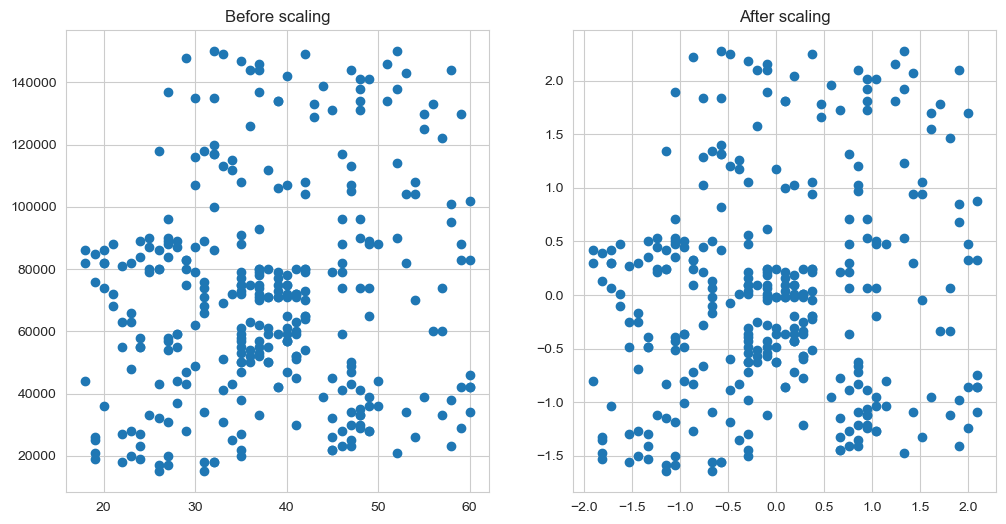

In [97]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axis[0].scatter(X_train['Age'],X_train['EstimatedSalary'])
axis[0].set_title("Before scaling")
axis[1].scatter(X_train_sca[:,0],X_train_sca[:,1])
axis[1].set_title("After scaling")

# Distribution Comparison

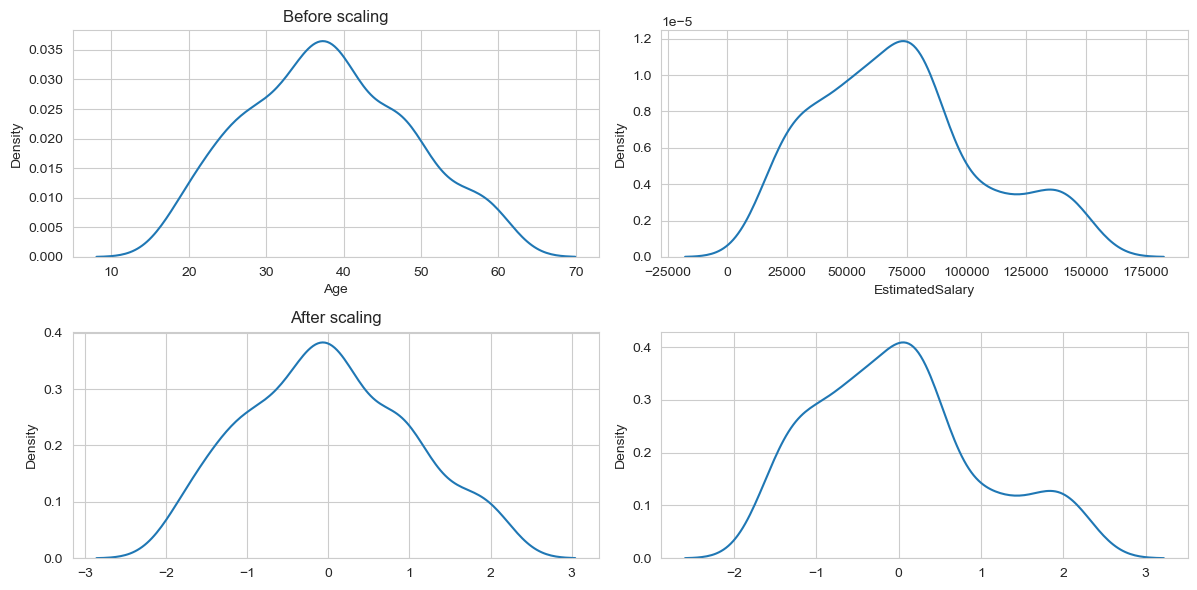

In [98]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12,6))
sns.kdeplot(data=X_train['Age'], ax=axis[0,0])
sns.kdeplot(data=X_train['EstimatedSalary'], ax=axis[0,1])
axis[0,0].set_title("Before scaling")

sns.kdeplot(data=X_train_sca[:,0], ax=axis[1,0])
sns.kdeplot(data=X_train_sca[:,1], ax=axis[1,1])
axis[1,0].set_title("After scaling")

plt.tight_layout()

# Effect in regression

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.9125

In [100]:
lr = LogisticRegression()
lr.fit(X_train_sca,y_train)
y_pred = lr.predict(X_test_sca)
accuracy_score(y_test, y_pred)

0.9